# IRIS Project - KNeighborsClassifier

### Import of required libraries

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
from sklearn import datasets
import matplotlib.pyplot as plt
%matplotlib inline
sns.set_style('whitegrid')

In [2]:
df = sns.load_dataset('iris')

In [3]:
df.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


In [4]:
X_train = df[['petal_length', 'petal_width']]

In [5]:
species_to_num = {'setosa': 0,
                 'versicolor': 1,
                 'virginica': 2}
df['species'] = df['species'].map(species_to_num)
y_train = df['species']

### KNeighborsClassifier

In [6]:
from sklearn.neighbors import KNeighborsClassifier

In [13]:
knn = KNeighborsClassifier(n_neighbors=1)
knn.fit(X_train, y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=1, p=2,
           weights='uniform')

### Model Performance Visualization

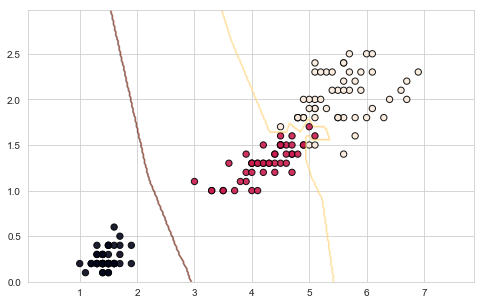

In [14]:
Xv = X_train.values.reshape(-1, 1)
h = 0.02
x_min, x_max = Xv.min(), Xv.max() +1
y_min, y_max = y_train.min(), y_train.max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                    np.arange(y_min, y_max, h))
z = knn.predict(np.c_[xx.ravel(), yy.ravel()])
z = z.reshape(xx.shape)
fig = plt.figure(figsize=(8, 5))
ax = plt.contour(xx, yy, z, cmap = 'afmhot', alpha=0.3
                );
plt.scatter(X_train.values[:, 0], X_train.values[:, 1], c=y_train, s=40,
           alpha=0.9, edgecolors='k');